In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
#The code was referent by THIEN1504 kaggle website https://www.kaggle.com/code/thien1504/m5-simple-fast-model

In [2]:
data=pd.read_pickle('data.pkl')
valid=data[(data['d']>=1914)&(data['d']<1942)][['id','d','sold']]
test=data[data['d']>=1942][['id','d','sold']]

In [3]:
def RF_model(X_train,y_train,X_valid,y_valid,N_e):
    model = RandomForestRegressor(
        n_estimators=N_e,
        max_depth=8,
        max_features='sqrt',
        random_state=18)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    mse = mean_squared_error(y_valid, y_pred)
    print ("RMSE:",mse**(1/2))

    return model

In [20]:
## testing number estimators
N_e_list=[50,100,150,200,250,300,350,400]


df= data[data['store_id']==0]
X_train,y_train=df[df['d']<1914].drop('sold',axis=1),df[df['d']<1914]['sold']
X_valid,y_valid=df[(df['d']>=1914)&(df['d']<1942)].drop('sold',axis=1),df[(df['d']>=1914)&(df['d']<1942)]['sold']

for N_e in N_e_list:
    print (N_e)
    model= RF_model(X_train,y_train,X_valid,y_valid,N_e)
    del model
    gc.collect()

50
RMSE: 2.0937804011806698
100
RMSE: 2.0966407711954855
150
RMSE: 2.0937417633738007
200
RMSE: 2.091889364061713
250
RMSE: 2.0912873998578903
300
RMSE: 2.091018427601848
350
RMSE: 2.090511039694892
400
RMSE: 2.090461755137518


In [1]:
N_e_list=[50,100,150,200,250,300,350,400]

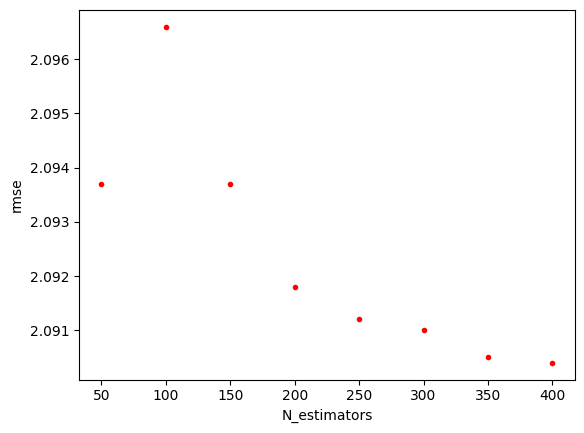

In [4]:
rmse_list= [2.0937,2.0966,2.0937,2.0918,2.0912,2.0910,2.0905,2.0904]
plt.plot(N_e_list,rmse_list,'r.')
plt.xlabel('N_estimators')
plt.ylabel('rmse')
plt.savefig('N_e_test.png')

In [4]:
cal=pd.read_csv('./data/calendar.csv')
sales_train_evaluation=pd.read_csv('data/sales_train_evaluation.csv')

In [5]:
def downcase(df):  
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
    return df

In [6]:
cal=downcase(cal)
sales_train_evaluation=downcase(sales_train_evaluation)
catalog_all=pd.melt(sales_train_evaluation,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],var_name='d',value_name='sold')
catalog_all=pd.merge(catalog_all,cal,on='d',how='left')
d_id=dict(zip(catalog_all['id'].cat.codes,catalog_all['id']))
del cal,sales_train_evaluation
gc.collect

<function gc.collect(generation=2)>

In [7]:
for i in range(10):
    df= data[data['store_id']==i]
    X_train,y_train=df[df['d']<1914].drop('sold',axis=1),df[df['d']<1914]['sold']
    X_valid,y_valid=df[(df['d']>=1914)&(df['d']<1942)].drop('sold',axis=1),df[(df['d']>=1914)&(df['d']<1942)]['sold']
    X_test= df[df['d']>=1942].drop('sold',axis=1)
    print (f'-----Train model for store {i}------')
    model= RF_model(X_train,y_train,X_valid,y_valid,350)
    
    print (f'-----predicting for store {i}------')
    pred_val= model.predict(X_valid)
    valid.loc[X_valid.index,'sold']=pred_val
    pred_eva=model.predict(X_test) 
    test.loc[X_test.index,'sold']= pred_eva
    print ('----------store model---------------')
    filename=f'model_store_RF_{i}.pkl'
    joblib.dump(model,filename)
    del model,X_train,y_train,X_valid,y_valid,X_test
    gc.collect()

-----Train model for store 0------
RMSE: 2.094544083036719
-----predicting for store 0------
----------store model---------------
-----Train model for store 1------
RMSE: 1.9940143211613874
-----predicting for store 1------
----------store model---------------
-----Train model for store 2------
RMSE: 2.451124073280837
-----predicting for store 2------
----------store model---------------
-----Train model for store 3------
RMSE: 1.4267793471563195
-----predicting for store 3------
----------store model---------------
-----Train model for store 4------
RMSE: 1.6726446147888345
-----predicting for store 4------
----------store model---------------
-----Train model for store 5------
RMSE: 1.836030350922755
-----predicting for store 5------
----------store model---------------
-----Train model for store 6------
RMSE: 1.900151792439781
-----predicting for store 6------
----------store model---------------
-----Train model for store 7------
RMSE: 1.6711800851647274
-----predicting for store 7

In [8]:
sample_sub=pd.read_csv('data/sample_submission.csv')

In [9]:
sample_sub = sample_sub[['id']]
f_col= [f'F{i}' for i in range(1,29)]
f_col.insert(0,'id')

valid['id']=valid['id'].map(d_id)
valid=valid.pivot(index='id',columns='d',values='sold').reset_index()
valid['id']=valid['id'].str.replace("evaluation","validation")
out_val=pd.merge(left=sample_sub[:30490],right=valid,on='id')
out_val.columns=f_col

test['id'] = test['id'].map(d_id)
test = test.pivot(index='id',columns='d',values='sold').reset_index()
out_eva=pd.merge(left=sample_sub[30490:],right=test,on='id')
out_eva.columns=f_col

submit= pd.concat([out_val,out_eva],ignore_index=True)

In [11]:
submit

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0.571924,0.549656,0.521393,0.542062,0.564117,0.691457,0.591534,0.758412,0.627492,...,0.598663,0.839422,1.085910,0.726496,0.504568,0.414098,0.517167,0.863892,1.149635,0.526622
1,HOBBIES_1_002_CA_1_validation,0.229713,0.330171,0.471471,0.313153,0.165081,0.173899,0.169358,0.363782,0.269935,...,0.166103,0.174652,0.379656,0.508283,0.459796,0.471493,0.313735,0.342380,0.436883,0.430779
2,HOBBIES_1_003_CA_1_validation,0.511612,0.468794,0.384811,0.498880,0.608885,0.477564,0.562402,0.486461,0.424139,...,0.520387,0.692975,0.555375,0.420763,0.439602,0.371300,0.362698,0.622443,0.703946,0.655617
3,HOBBIES_1_004_CA_1_validation,2.351183,1.394482,1.254957,1.695332,2.344336,3.073502,2.933100,2.190875,2.007212,...,2.169585,2.483761,3.091729,1.773396,1.877424,1.606104,1.648758,2.001424,1.994557,2.804731
4,HOBBIES_1_005_CA_1_validation,1.200096,1.074119,1.062718,1.188878,1.413420,1.612824,1.332291,1.049909,1.257585,...,1.397514,1.345792,1.419636,1.042275,1.277361,1.246123,1.031862,0.866480,1.288447,1.470940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0.711500,0.636969,0.539096,0.207778,0.599158,0.576468,0.705221,0.354855,0.350812,...,0.303601,0.213109,0.318531,0.211318,0.312429,0.208827,0.292654,0.300571,0.211934,0.219031
60976,FOODS_3_824_WI_3_evaluation,0.437582,0.177524,0.339153,0.379133,0.376582,0.379061,0.186614,0.184199,0.276523,...,0.173531,0.183448,0.189380,0.184935,0.180588,0.181214,0.179956,0.173473,0.249875,0.186576
60977,FOODS_3_825_WI_3_evaluation,1.079878,0.971098,0.671982,0.592972,0.652619,0.806355,0.702220,0.700838,0.355034,...,0.377387,0.381798,0.253744,0.241634,0.357436,0.367910,0.235353,0.354753,0.253393,0.373213
60978,FOODS_3_826_WI_3_evaluation,1.186952,0.741194,0.583080,0.647965,0.586323,0.624746,0.649964,0.505066,0.629303,...,0.284935,0.285125,0.294848,0.279059,0.287207,0.296455,0.342516,0.196344,0.282739,0.293054


In [10]:
submit.to_csv('submission_RF.csv')

In [12]:
submit.to_pickle('submission_RF.pkl')